# Box plot

In [1]:
import pandas as pd
%matplotlib inline
%config InlineBacken.figure_format = 'svg'

In [2]:
df = pd.read_csv('data.csv', index_col='City')

In [3]:
# Define chart labels
chart_title = 'Box Plot'
chart_subtitle = 'Balanced Scorecard by Location'
chart_ylabel = 'Score (Index)'
chart_xlabel = 'Location'

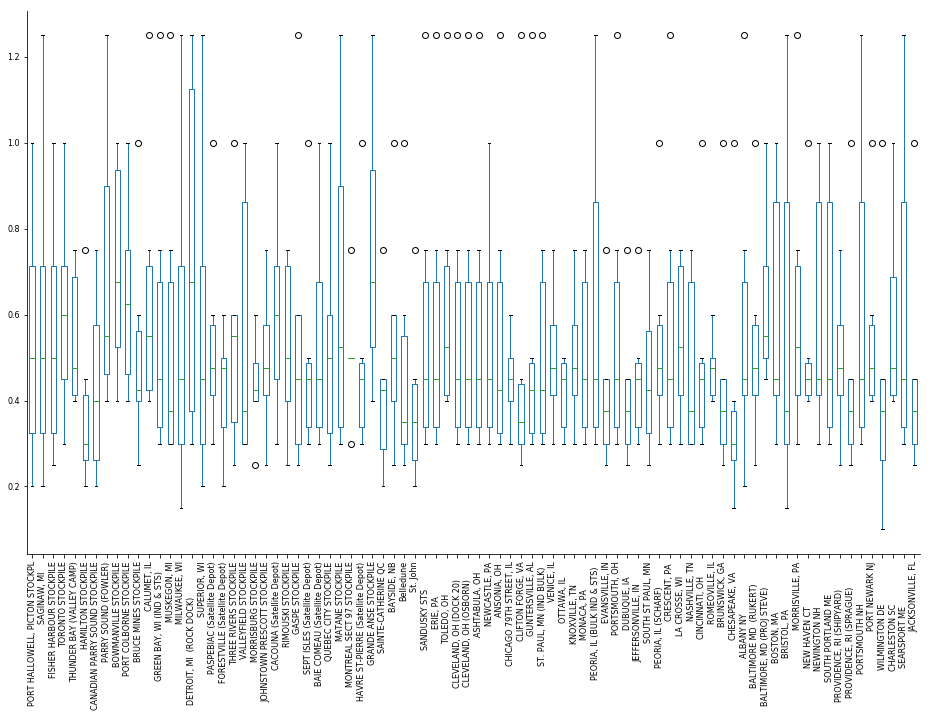

In [4]:
# T is transpose index and columns
#ax = df.T.plot.box(notch=True, showmeans=True)
ax = df.T.plot.box(figsize=(16, 10), rot=90, fontsize=8)
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

In [5]:
ax.figure.savefig('box_plot.svg', format='svg')
ax.figure.savefig('box_plot.pdf', format='pdf')